In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df=pd.read_csv(r'https://raw.githubusercontent.com/dsrscientist/DSData/master/loan_prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [13]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### data preprocessing

In [14]:
# Label Encoding data Set
df.Loan_Status = df.Loan_Status.map({'Y':1,'N':0})
df.Gender = df.Gender.map({"Male":1,"Female":0})
df.Married = df.Married.map({"Yes":1,"No":0})
df.Dependents = df.Dependents.map({"0":0,"1":1,"2":2, "3+":3})
df.Education = df.Education.map({"Graduate":1,"Not Graduate":0})
df.Self_Employed = df.Self_Employed.map({"Yes":1,"No":0})
df.Property_Area = df.Property_Area.map({"Rural":0,"Semiurban":1,"Urban":2})

In [15]:
df= df.drop('Loan_ID',axis = 1)
df

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,1,0.0,5849,0.0,NaN,360.0,1.0,2,1
1,1.0,1.0,1.0,1,0.0,4583,1508.0,128.0,360.0,1.0,0,0
2,1.0,1.0,0.0,1,1.0,3000,0.0,66.0,360.0,1.0,2,1
3,1.0,1.0,0.0,0,0.0,2583,2358.0,120.0,360.0,1.0,2,1
4,1.0,0.0,0.0,1,0.0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,1,0.0,2900,0.0,71.0,360.0,1.0,0,1
610,1.0,1.0,3.0,1,0.0,4106,0.0,40.0,180.0,1.0,0,1
611,1.0,1.0,1.0,1,0.0,8072,240.0,253.0,360.0,1.0,2,1
612,1.0,1.0,2.0,1,0.0,7583,0.0,187.0,360.0,1.0,2,1


In [16]:
df.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [17]:
# Dealing With NULL Values of the data set
df.Gender.fillna(np.random.randint(0,2),inplace = True)
df.Dependents.fillna(df.Dependents.mean(), inplace = True)
df.Married.fillna(np.random.randint(0,2),inplace = True)
df.Self_Employed.fillna(np.random.randint(0,2),inplace = True)
df.LoanAmount.fillna(df.LoanAmount.median(), inplace = True)
df.Loan_Amount_Term.fillna(df.Loan_Amount_Term.mean(), inplace = True)
df.Credit_History.fillna(np.random.randint(0,2),inplace = True)

In [18]:
df.isna().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:>

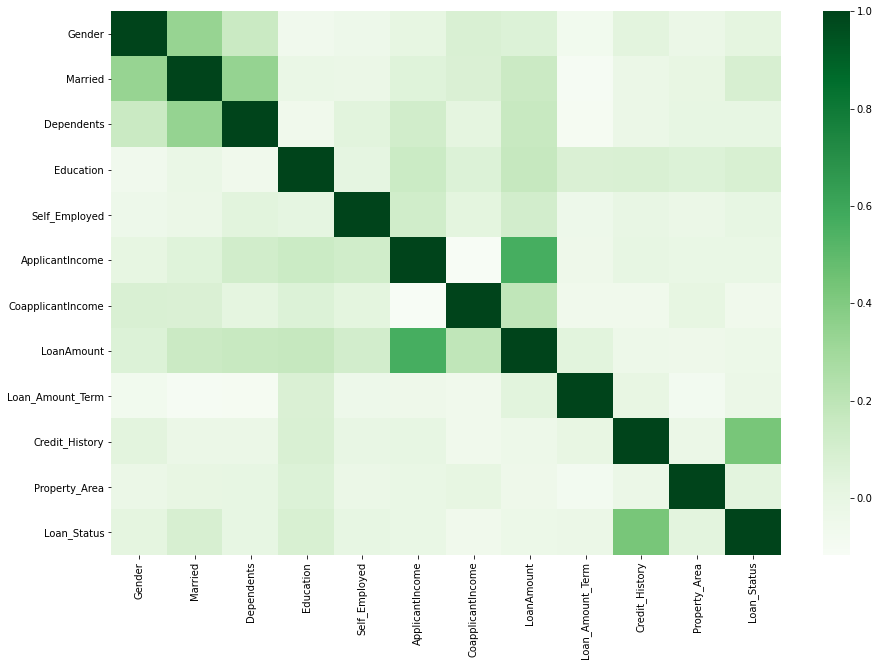

In [25]:
plt.figure(figsize = (15,10))
cor = df.corr()
sns.heatmap(cor, cmap = "Greens")

In [26]:
df.Gender.value_counts()

1.0    489
0.0    125
Name: Gender, dtype: int64

### Training ML model and compare their accuracy

In [27]:
# Importing modules for training our model
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [28]:
model_list = []
model_list.append(("Logistic Regression",LogisticRegression()))
model_list.append(("Decision Tree Classifier", DecisionTreeClassifier()))
model_list.append(("Linear Discriminant Analysis", LinearDiscriminantAnalysis()))
model_list.append(("Support Vector Classifier", SVC()))
model_list.append(("K Nearest Neighbors", KNeighborsClassifier()))
model_list.append(("Naive Bayes",GaussianNB()))
model_list.append(("Random Forest Classifier",RandomForestClassifier()))
model_list.append(("XGBoost Classifier", XGBClassifier()))

In [31]:
y = df.Loan_Status
X = df.drop('Loan_Status',axis = 1)

In [33]:
score_list = []
model_names_list = []
for name, model in model_list:
  kfold = KFold(n_splits =10)
  cv_score = cross_val_score(model,X,y,cv = kfold, scoring = "accuracy")
  score_list.append(cv_score.mean())
  model_names_list.append(name)

C:\Users\91832\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\91832\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[09:33:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\91832\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of 

[09:33:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


<BarContainer object of 8 artists>

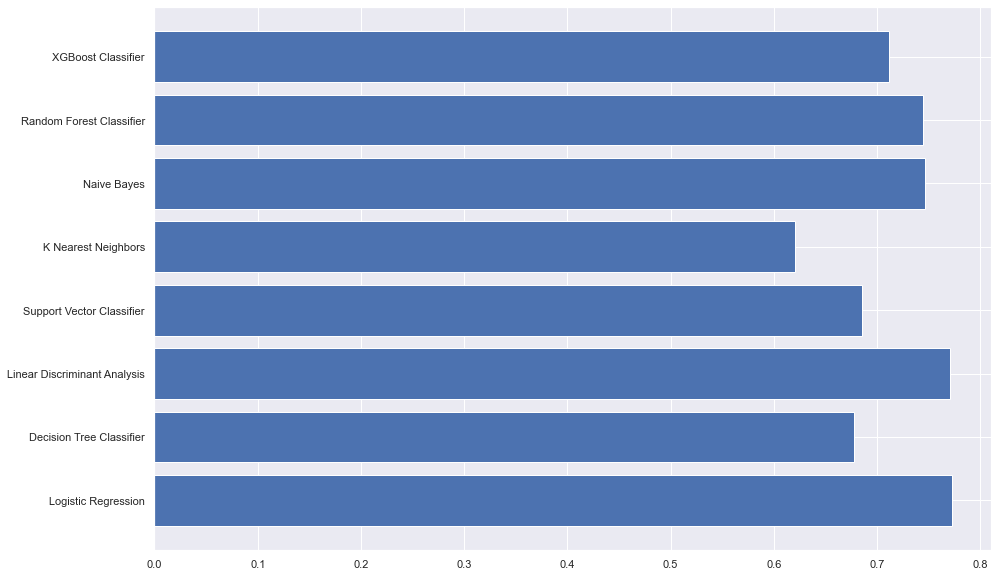

In [34]:
sns.set_theme(style = "darkgrid")
plt.figure(figsize = (15,10))
plt.barh(model_names_list, score_list)

In [36]:
model = LinearDiscriminantAnalysis()
model.fit(X,y)

LinearDiscriminantAnalysis()

### Training an ANN

In [42]:
!pip install keras
!pip install tensorflow

  Created wheel for termcolor: filename=termcolor-1.1.0-py3-none-any.whl size=4829 sha256=64d8c3523427e0781a2f5e89e7ce000017cc2f38184fda00942f1dfc3ef0e35c
  Stored in directory: c:\users\91832\appdata\local\pip\cache\wheels\a0\16\9c\5473df82468f958445479c59e784896fa24f4a5fc024b0f501
Successfully built termcolor
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Uninstalling importlib-metadata-3.10.0:
      Successfully uninstalled importlib-metadata-3.10.0
  Using cached gast-0.5.3-py3-none-any.whl (19 kB)
  Using cached libclang-13.0.0-py2.py3-none-win_amd64.whl (13.9 MB)
  Using cached tensorflow_io_gcs_filesystem-0.24.0-cp38-cp38-win_amd64.whl (1.5 MB)
  Using cached tf_estimator_nightly-2.8.0.dev2021122109-py2.py3-none-any.whl (462 kB)
  Using cached absl_py-1.0.0-py3-none-any.whl (126 kB)
  Using cached opt_einsum-3.3.0-py3-none-any.whl (65 kB)
  Using cached grpcio-1.44.0-cp38-cp38-win_amd64.whl (3.4 MB)
  Using cached protob

In [43]:
import keras
import tensorflow as tf 
from keras.models import Sequential
from keras.layers import InputLayer, Dense

In [44]:
input_neurons = X.shape[1]
output_neurons = 1
number_of_hidden_layers = 2
neurons_hidden_layer1 = 10
neurons_hidden_layer2 = 5

In [46]:
ANN_model = Sequential()
ANN_model.add(InputLayer(input_shape=(input_neurons, )))
ANN_model.add(Dense(units = neurons_hidden_layer1, activation = 'tanh'))
ANN_model.add(Dense(units = neurons_hidden_layer2, activation = 'tanh'))
#ANN_model.add(Dense(units = neurons_hidden_layer3, activation = 'relu'))
ANN_model.add(Dense(units = output_neurons, activation = 'sigmoid'))

In [47]:
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 10)                120       
                                                                 
 dense_4 (Dense)             (None, 5)                 55        
                                                                 
 dense_5 (Dense)             (None, 1)                 6         
                                                                 
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [48]:
ANN_model.compile(loss = 'binary_crossentropy', optimizer = 'SGD', metrics = ['accuracy'])

In [49]:
#from sklearn.model_selection import train_test_split
#train_X, train_y, test_X, test_y = train_test_split(X, y, test_size = 0.2, random_state = 0)
ANN_model_history = ANN_model.fit(X, y, epochs = 10)

Epoch 1/10
20/20 [==============================] - 1s 2ms/step - loss: 0.6620 - accuracy: 0.6352
Epoch 2/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6368 - accuracy: 0.6710
Epoch 3/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6385 - accuracy: 0.6710
Epoch 4/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6324 - accuracy: 0.6808
Epoch 5/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6280 - accuracy: 0.6808
Epoch 6/10
20/20 [==============================] - 0s 1ms/step - loss: 0.6265 - accuracy: 0.6808
Epoch 7/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6256 - accuracy: 0.6808
Epoch 8/10
20/20 [==============================] - 0s 3ms/step - loss: 0.6247 - accuracy: 0.6808
Epoch 9/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6243 - accuracy: 0.6808
Epoch 10/10
20/20 [==============================] - 0s 2ms/step - loss: 0.6232 - accuracy: 0.6808


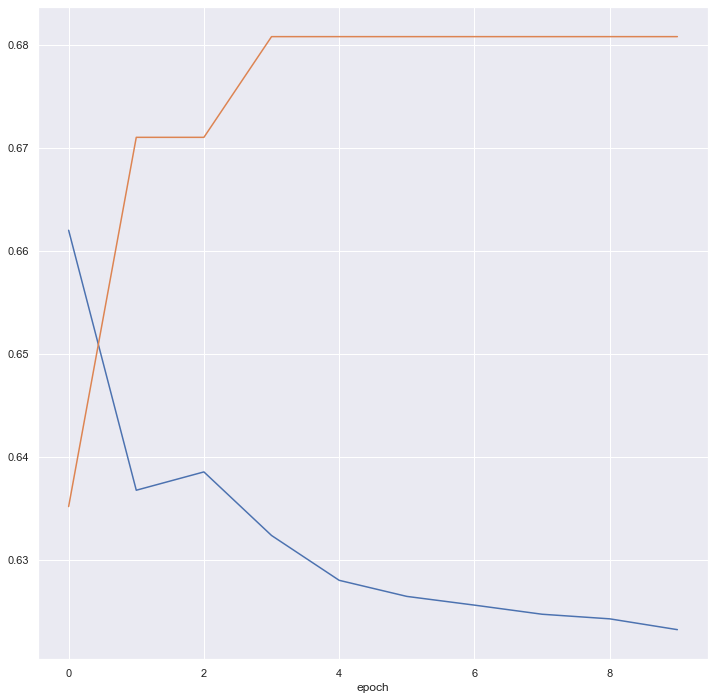

In [50]:
plt.figure(figsize = (12,12))
plt.plot(ANN_model_history.history['loss'])
plt.plot(ANN_model_history.history['accuracy'])
plt.xlabel('epoch')
plt.show()